<a href="https://colab.research.google.com/github/junjunmeng/algo/blob/master/Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.(2sum & 3sum)

## Q1: 2 sum

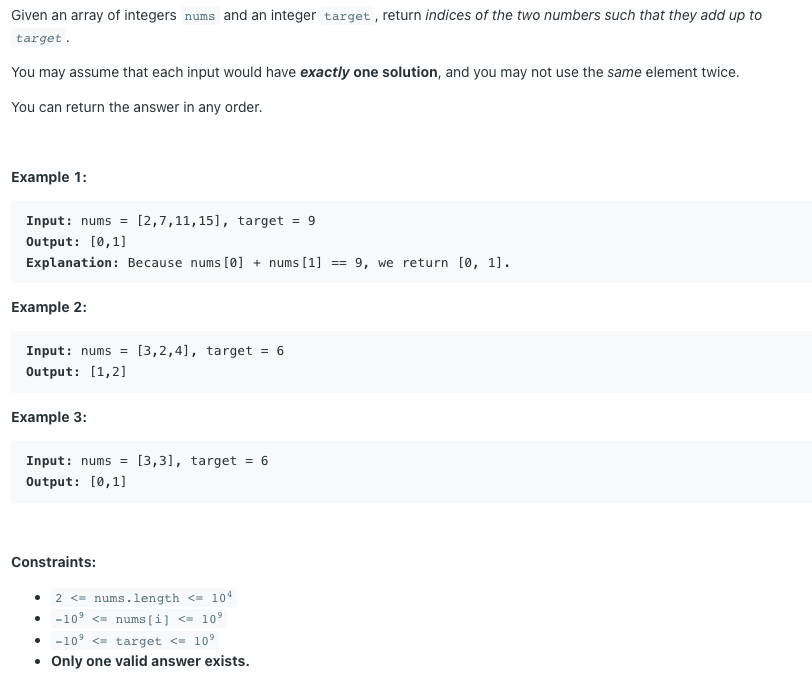


### Notes: need to clarify with interviewer:
1. sorted or non-sorted
2. duplicate
3. sample size

In [ ]:
def twosums(nums:list, target:int):
  for i in range(0, len(nums)):
    for j in range(i+1, len(nums)):
      if nums[i] + nums[j] == target:
       return ([i,j])

In [ ]:
#sorted 2sum
def twosums(nums:list, target:int):
  i, j = 0, len(nums) - 1
  while i < j:
    if nums[i] + nums[j] < target:
      i += 1
    elif nums[i] + nums[j] > target:
      j -= 1
    else:
      return True
  return False

In [ ]:
nums = [3,2,4, 2,4]
target = 6

twosums(nums, target) 


True

In [ ]:
def twosums(nums: list, target: int):
  if not nums:
    return []
  
  dic = {}
  for idx, v in enumerate(nums):
    res = target - v
    if res in dic:
      return [idx, dic[res]]
    else:
      dic[v] = idx
  return ("No two sum solution")


In [ ]:
twosums(nums, target)

[2, 1]

## Q2: 3 sum
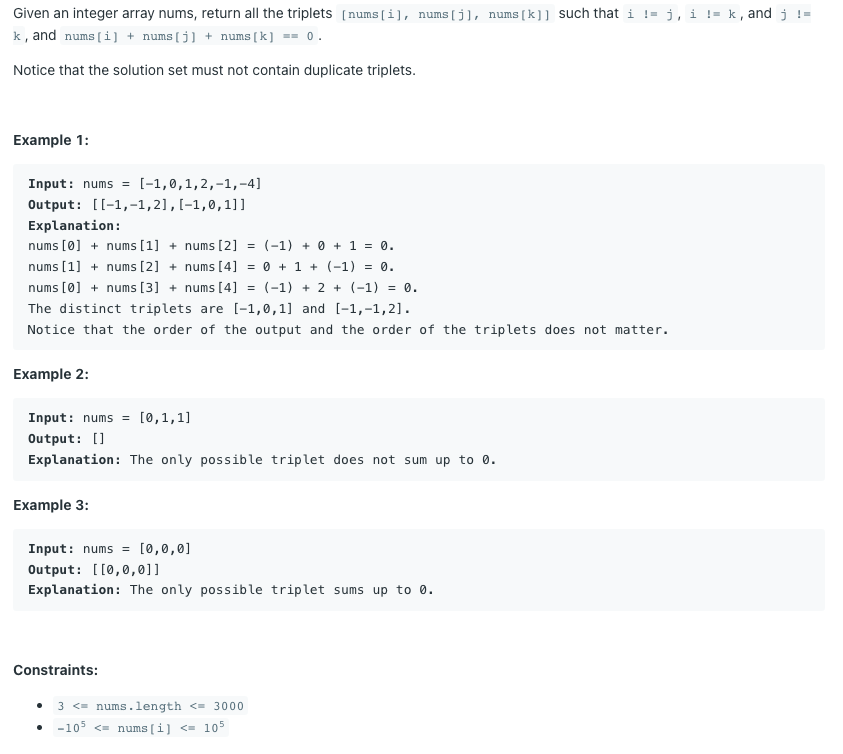

Notes: 
1. remove duplicates


In [ ]:
def threesums(nums:list, target: int):
  if len(nums) < 3:
    return []
  nums.sort()
  res = set()
  
  for idx, v in enumerate(nums[:-2]):
    if idx >= 1 and v == nums[idx-1]:
      continue
    
    d = {}
    for x in nums[idx+1:]:
      if x not in d:
        d[-v-x] = 1
      else:
        res.add((v, -v-x, x))
  return map(list, res)


In [ ]:
nums = [-1,0,1,2,4, -1, 0, 1]
target = 0
threesums(nums)

[[-1, -1, 2], [-1, 0, 1]]

In [ ]:
def threesums(nums:list):
  res = []
  nums.sort()

  for i, a in enumerate(nums):
    if i > 0 and a == nums[i-1]:
      continue
    
    l, r = i+1, len(nums)-1
    while l < r:
      threesum = a + nums[l] + nums[r]
      if threesum > 0:
        r -= 1
      elif threesum < 0:
        l += 1
      else:
        res.append([a, nums[l], nums[r]])
        l += 1
        while nums[l] == nums[l-1] and l < r:
          l += 1
  return res

In [ ]:
def threeSum(self, nums: List[int]) -> List[List[int]]:
    result = []
    nums.sort()
    for i in range(len(nums) - 2):
        #check dup
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        left = i + 1
        right = len(nums) - 1
        while left < right:
            total = nums[i] + nums[left] + nums[right]
            if total > 0:
                right -= 1
            elif total < 0:
                left += 1
            else:
                result.append((nums[i], nums[left], nums[right]))
                  #remove dup
                while left < right and nums[left] == nums[left + 1]: 
                    left += 1
                while left < right and nums[right] == nums[right - 1]:
                    right -= 1
                left += 1
                right -= 1
    return result

#2.(remove dups in array / string): Stack

##Q1: [26. Remove Duplicates from Sorted Array](https://leetcode.com/problems/remove-duplicates-from-sorted-array/)


Given an integer array nums sorted in non-decreasing order, remove the duplicates in-place such that each unique element appears only once. The relative order of the elements should be kept the same.

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are k elements after removing the duplicates, then the first k elements of nums should hold the final result. It does not matter what you leave beyond the first k elements.

Return k after placing the final result in the first k slots of nums.

follow up question: [80. Remove Duplicates from Sorted Array II](https://leetcode.com/problems/remove-duplicates-from-sorted-array-ii/)

In [ ]:
def removeDuplicates(nums):
    #corner case
    if len(nums) < 2:
        return len(nums)
    slow = 0
    fast = 1
    while fast < len(nums):
        if nums[fast] != nums[slow]:
            slow += 1
            nums[slow] = nums[fast]
        fast += 1
    return slow + 1

In [ ]:
nums = [1,4,4, 7,7,7,7, 8]

In [ ]:
#follow up question 80
def removeDuplicates(nums):
    #corner case
    if len(nums) < 3:
        return len(nums)
    slow = fast = 2
    while fast < len(nums):
        if nums[fast] != nums[slow - 2]:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    return slow,nums[:slow-1]

In [ ]:
removeDuplicates(nums)

(7, [1, 4, 4, 7, 7, 8])

##Q2: [1047. Remove All Adjacent Duplicates In String](https://leetcode.com/problems/remove-all-adjacent-duplicates-in-string/)


You are given a string s consisting of lowercase English letters. A duplicate removal consists of choosing two adjacent and equal letters and removing them.

We repeatedly make duplicate removals on s until we no longer can.

Return the final string after all such duplicate removals have been made. It can be proven that the answer is unique.

follow up question: [1209. Remove All Adjacent Duplicates in String II](https://leetcode.com/problems/remove-all-adjacent-duplicates-in-string-ii/) 


In [ ]:
def removeDuplicates(self, s: str) -> str:
    #corner case
    if not s or len(s) == 1:
        return s
    stack = []
    for char in s:
        if stack and stack[-1] == char:
            stack.pop()
        else:
            stack.append(char)
    return "".join(stack)

In [ ]:
#follow up question 1209 
#explanations: 
# Solution 2: Stack
# Save the character c and its count to the stack.
# If the next character c is same as the last one, increment the count.
# Otherwise push a pair (c, 1) into the stack.
# I used a dummy element ('#', 0) to avoid empty stack.
# Complexity
# Time O(N) for one pass
# Space O(N)

def removeDuplicates(self, s, k):
    stack = [['#', 0]]
    for c in s:
        if stack[-1][0] == c:
            stack[-1][1] += 1
            if stack[-1][1] == k:
                stack.pop()
        else:
            stack.append([c, 1])
    return ''.join(c * f for c, f in stack)

## Q3: [121. Best Time to Buy and Sell Stock](https://leetcode.com/problems/best-time-to-buy-and-sell-stock/)

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

follow up question: [122. Best Time to Buy and Sell Stock II](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/)

In [ ]:
def maxProfit(self, prices: List[int]) -> int:
    #corner case
    if not prices or len(prices) == 1:
        return 0
    dp = [None] * len(prices)
    #base case
    dp[0] = 0
    curMin = prices[0]
    #induction rule
    for i in range(1, len(prices)):
        dp[i] = max(dp[i - 1], prices[i] - curMin)
        curMin = min(curMin, prices[i])
    return dp[len(prices) - 1]

In [ ]:
#follow up question 122
def maxProfit(self, prices: List[int]) -> int:
    #base case
    preMax = 0
    curMax = 0
    #induction rule
    for i in range(1, len(prices)):
        todayGain = prices[i] - prices[i - 1] 
        preMax = max(preMax + todayGain, preMax) 
    return curMax

#3.(reverse string)
O(1):swap with left and right point 

## Q1: [344. Reverse String](https://leetcode.com/problems/reverse-string/)
Write a function that reverses a string. The input string is given as an array of characters s.

You must do this by modifying the input array in-place with O(1) extra memory.

Example 1:

Input: s = ["h","e","l","l","o"]
Output: ["o","l","l","e","h"]

follow-up question: [189. Rotate Array](https://leetcode.com/problems/rotate-array/)

In [ ]:
#Q344
def reverseString(self, s: List[str]) -> None:
    """
    Do not return anything, modify s in-place instead.
    """
    #corner case
    if not s or len(s) == 1:
        return s
    left = 0
    right = len(s) - 1
    while left < right:
        temp = s[left]
        s[left] = s[right]
        s[right] = temp
        left += 1
        right -= 1
    return s

In [ ]:
string = ["h","e","l","l","o"] 
a = string[::-1]
print(a)
print(string)

['o', 'l', 'l', 'e', 'h']
['h', 'e', 'l', 'l', 'o']


In [ ]:
# Q189
class Solution:
    def rotate(self, nums: List[int], k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        
        if not nums or len(nums) == 1:
            return nums
        
        r = k % len(nums)
        nums[:r], nums[r:] = nums[len(nums)-r: ], nums[:len(nums)-r]
        

In [ ]:
#Q189
def rotate(self, nums: List[int], k: int) -> None:
    """
    Do not return anything, modify nums in-place instead.
    """
    #corner case
    if not nums:
        return None
    
    k %= len(nums)
    self.helper(nums, 0, len(nums) - 1)
    self.helper(nums, 0 , k - 1)
    self.helper(nums, k, len(nums) - 1)
    
    
def helper(self, nums, left, right):
    while left < right:
        temp = nums[right]
        nums[right] = nums[left]
        nums[left] = temp
        left += 1
        right -= 1

## Q2: [151. Reverse Words in a String](https://leetcode.com/problems/reverse-words-in-a-string/)
Given an input string s, reverse the order of the words.

A word is defined as a sequence of non-space characters. The words in s will be separated by at least one space.

Return a string of the words in reverse order concatenated by a single space.

Note that s may contain leading or trailing spaces or multiple spaces between two words. The returned string should only have a single space separating the words. Do not include any extra spaces.

Example 1:

Input: s = "the sky is blue" 

Output: "blue is sky the"

In [ ]:
#Q151
def reverseWords(self, s: str) -> str:
    arr = list(s)
    self.reverseEntireString(arr, 0, len(arr) - 1)
    self.reverseEachWord(arr)
    res = self.pythonTrimSpace(arr)
    res = self.removeExtraSpace(res)
    return ''.join(res)
    

def reverseEntireString(self, arr, left, right):
    while left < right:
        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1
    #return arr

def reverseEachWord(self, arr):
    slow = fast = 0
    while fast < len(arr):
        while fast < len(arr) and not arr[fast].isspace():
            fast += 1
        self.reverseEntireString(arr, slow, fast -1)
        fast += 1
        slow = fast
    #return arr

def pythonTrimSpace(self, arr):
    '''str.strip() basically'''
    #corner case 
    if ''.join(arr).isspace():
        return arr
    left = 0
    right = len(arr) - 1
    while left < right and arr[left].isspace(): left += 1
    while left < right and arr[right].isspace(): right -= 1
    return arr[left: right + 1]

def removeExtraSpace(self, arr):
    '''remove duplicating space in a sentence'''
    '''such as Input: s = "a good   example" '''
    if not arr: return arr
    res = [arr[0]]            
    for i in range(1, len(arr)):
        if res[-1].isspace() and arr[i].isspace(): continue
        res.append(arr[i])
    return res

In [ ]:
s = "the sky is blue"
s.split(" ")[::-1]

['blue', 'is', 'sky', 'the']

# 4.(string)

## Q1: [242. Valid Anagram](https://leetcode.com/problems/valid-anagram/)
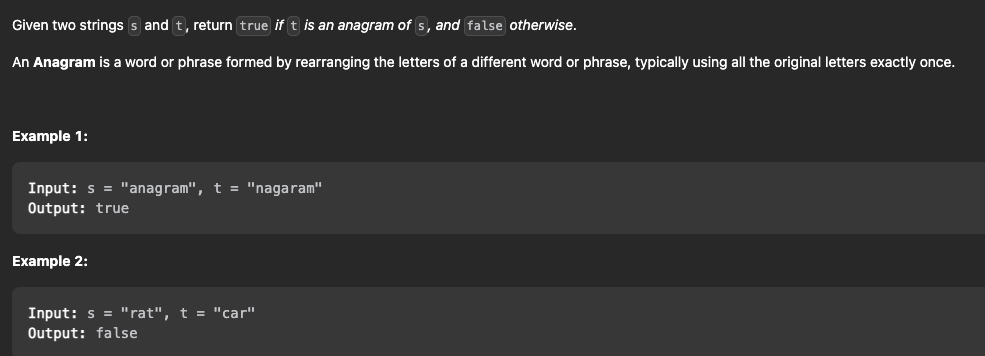

In [ ]:
def isAnagram(self, s, t):
    """
    :type s: str
    :type t: str
    :rtype: bool
    """
    if len(s) != len(t):
        return False
    freq_s = dict()
    for char in s:
        if char in freq_s:
            freq_s[char] += 1
        else:
            freq_s[char] = 1
    for i in t:
        if i in freq_s and freq_s[i] != 0: 
            freq_s[i] -= 1
        else:
            return False
    return True

## Q2: [14. Longest Common Prefix](https://leetcode.com/problems/longest-common-prefix/)
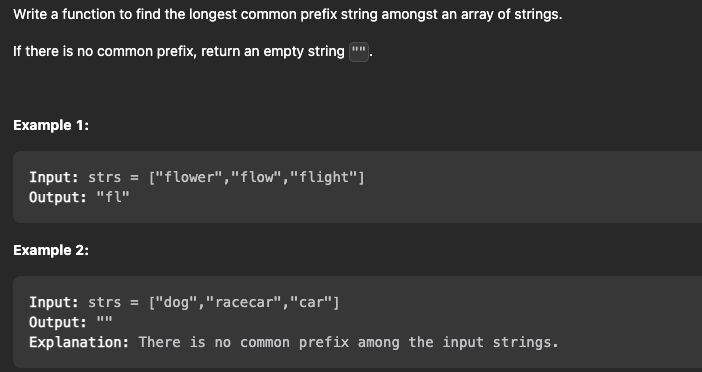


In [ ]:
def longestCommonPrefix(self, strs) -> str:
    #corner case
    if not strs or len(strs) == 0:
        return ""
    for i in range(len(strs[0])):
        for j in range(1, len(strs)):
            if i == len(strs[j]) or strs[j][i] != strs[0][i]:
                return strs[0][: i]
    return strs[0] 

In [ ]:
strs = ['flower', 'flow', 'flight']
longestCommonPrefix(b)


## Q3: [5. Longest Palindromic Substring](https://leetcode.com/problems/longest-palindromic-substring/)
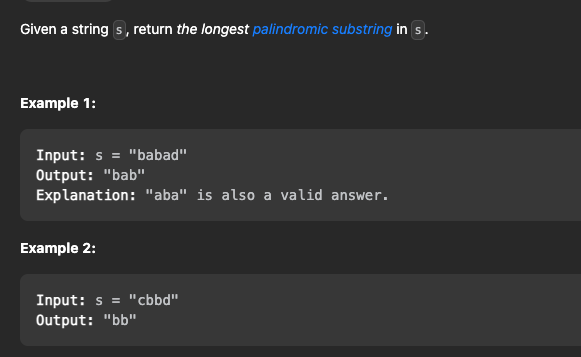

In [ ]:
def longestPalindrome(self, s: str) -> str:
    res = ""
    for i in range(len(s)):
        # odd case, like "aba"
        tmp = self.helper(s, i, i)
        if len(tmp) > len(res):
            res = tmp
        # even case, like "abba"
        tmp = self.helper(s, i, i+1)
        if len(tmp) > len(res):
            res = tmp
    return res

# get the longest palindrome, l, r are the middle indexes   
# from inner to outer
def helper(self, s, l, r):
    while l >= 0 and r < len(s) and s[l] == s[r]:
        l -= 1; r += 1
    return s[l+1:r]

# 5.(linked list)

## Q1: [21. Merge Two Sorted Lists](https://leetcode.com/problems/merge-two-sorted-lists/)
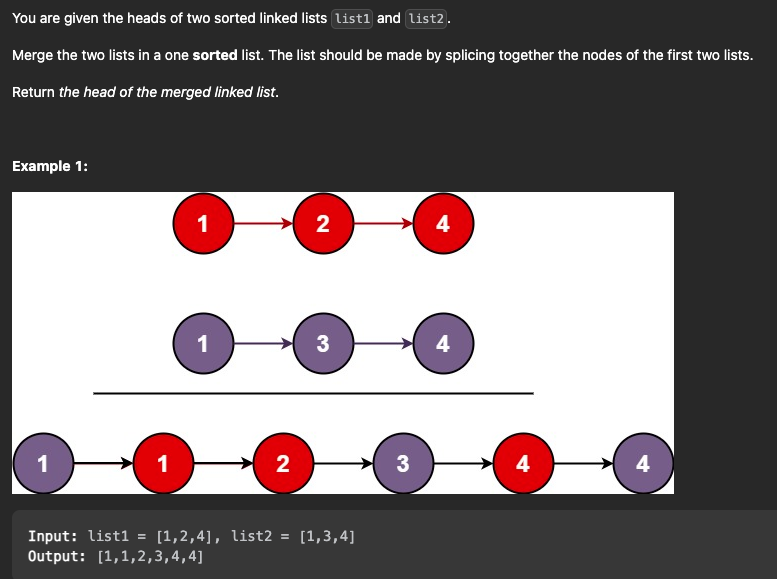

In [ ]:
def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
    #corner case
    if not list1 or not list2:
        return list1 or list2
    dummy_head = ListNode(None)
    cur = dummy_head
    while list1 and list2:
        if list1.val < list2.val:
            cur.next = list1
            list1 = list1.next 
        else:
            cur.next = list2
            list2 = list2.next
        cur = cur.next 
    cur.next = list1 or list2
    return dummy_head.next

## Q2: [234. Palindrome Linked List](https://leetcode.com/problems/palindrome-linked-list/)

In [ ]:
def isPalindrome(self, head: Optional[ListNode]) -> bool:
    """
    :type head: ListNode
    :rtype: bool
    """
    if not head or not head.next:
        return True

    slow = fast = head
    while fast.next and fast.next.next: 
        slow = slow.next
        fast = fast.next.next
    half = slow.next 
    slow.next = None
    slow = self.reverseList(half) 

    while slow:
        if head.val != slow.val:
            return False
        slow = slow.next
        head = head.next
    return True

def reverseList(self, head): 
    if not head or not head.next: 
        return head 
    new_head = self.reverseList(head.next)
    head.next.next = head
    head.next = None
    return new_head

## Q3: [2. Add Two Numbers](https://leetcode.com/problems/add-two-numbers/)
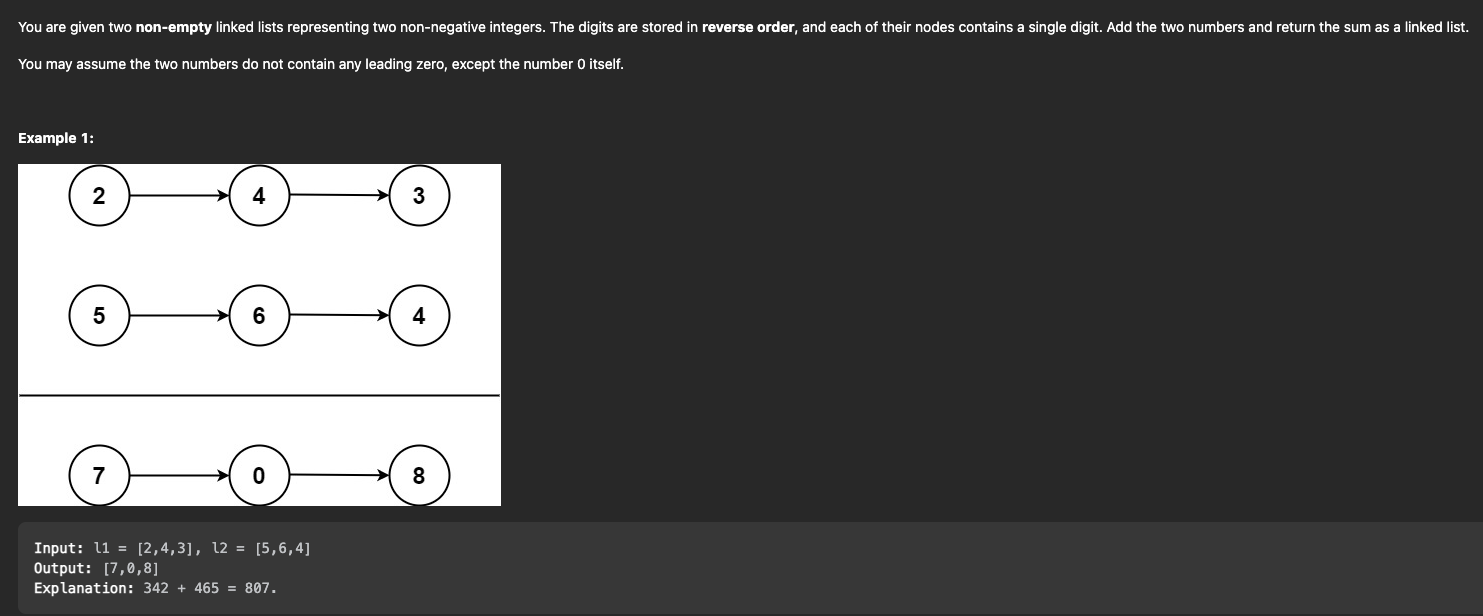

In [ ]:
def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
    #corner case
    if not l1 or not l2:
        return l1 or l2
    dummyHead = ListNode(None)
    cur = dummyHead
    carry = 0
    while l1 or l2 or carry:
        if l1:
            carry += l1.val
            l1 = l1.next
        if l2:
            carry += l2.val
            l2 = l2.next
        cur.next = ListNode(carry % 10)
        cur = cur.next
        carry //= 10
    return dummyHead.next

#6.(stats & ML questions)

## Q1: [Implement one-hot encoding](https://blog.51cto.com/u_15127501/3567888) and Target encoding
#### Notess: 1. The input is a list whose length is the same as the data length. 2. The output should be a list of list whose row num should be as same as the data length and the col num should be as same as the number of unique values of the input feature. One output example is [0,0,0,1,0,0]

In [ ]:
import numpy as np
import pandas as pd
def oneHotEncoder(y):
  uniqueValuesList = np.unique(y)
  #this dictionary helps to determine which row we should give value 1 of the final output matrix 
  rowNumDict = {}
  for i, v in enumerate(uniqueValuesList):
    rowNumDict[str(v)] = i

  result = np.zeros((len(y), len(uniqueValuesList)))
  for i, label in enumerate(y):
    result[i, rowNumDict[label]] = 1
  return result

In [ ]:
#example 
res = oneHotEncoder(['orange', 'banana', 'orange', 'orange', 'banana', 'banana', 'banana', 'apple', 'apple'])
res

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

In [ ]:
y = [('Texas', 'Florida'), 
    ('California', 'Alabama'), 
    ('Texas', 'Florida'), 
    ('Delware', 'NewYork'), 
    ('Texas', 'Alabama')]

In [ ]:
# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

# One-hot encode data
one_hot.fit_transform(['orange', 'banana', 'orange', 'orange', 'banana', 'banana', 'banana', 'apple', 'apple'])

array([[1, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0]])

In [ ]:
one_hot.fit_transform(y)

array([[0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1]])

In [ ]:
#target encoding
means= data.groupby(col).target.mean()
data[col+'_mean_target'] = data[col].map(means)

## Q2: [384. Shuffle an Array](https://leetcode.com/problems/shuffle-an-array/)
####Notes: 
1. all permutation has the same prob (1/n!) <=> all num has the same prob shows up in each position (1/n)
2. prob(choose numX at index n - 1, **Not** choose numX at index n) =
prob(choose numX at index n - 1 | **Not** choose numX at index n) * prob(**Not** choose numX at index n) = 1/n-1 * n-1/n = 1/n
3. If we choose to determine which number to put in an index position from back to front, the prob(choose numX at index n - 1 | **Not** choose numX at index n) = 1/index 当确定了后面的数字之后，从前面未确定的那些数字中任选一个并交换到待确定位置，这个事件的概率应该为1/index。index为前面一共有多少还未确定的数字。
4. random.randint(2,5) => 2, 3, 4, 5 左闭右闭

In [ ]:
import random
class Solution:

    def __init__(self, nums: List[int]):
        self.nums = nums
        

    def reset(self) -> List[int]:
        return self.nums 
        

    def shuffle(self) -> List[int]:
        res = self.nums[:]
        for i in range(len(res) - 1, 0, -1):
            randomNum = random.randint(0, i)
            res[i], res[randomNum] = res[randomNum], res[i]
        return res
         
        


# Your Solution object will be instantiated and called as such:
# obj = Solution(nums)
# param_1 = obj.reset()
# param_2 = obj.shuffle()

## Q3: [470. Implement Rand10() Using Rand7()](https://leetcode.com/problems/implement-rand10-using-rand7/)
####Notes: 
1. check the Approach 1: Rejection Sampling in leetcode solution ([link](https://leetcode.com/problems/implement-rand10-using-rand7/solution/))
2. check this answer for generalized case [link](https://leetcode.com/problems/implement-rand10-using-rand7/discuss/816927/Python-generalised-solution-for-RandM()-using-RandN())
3. It's reasonable to think about rand7 + rand7, but the prob is not the same for all the output results. So we generate a maxtix by rand7 which can give us range 0-48 (inclusive). To achive this we use (rand7 - 1) * 7 + (rand7 - 1). Then we determin the acceptable range: here should be 40 (equation: acceptable = N * N - (N * N) % M ) 

In [ ]:
class Solution:
    def rand10(self):
        """
        :rtype: int
        """
        output = (rand7() - 1) * 7 + (rand7() - 1)
        rangeMax = 40 # 7*7 - (7*7) % 10
        if output >= rangeMax:
            output = (rand7() - 1) * 7 + (rand7() - 1)
        return output % 10 + 1

## Q4: [find the 95th percentile](https://hjweds.gitbooks.io/leetcode/content/95-percentile.html)
####Notes:Given a list of integers representing the lengths of urls, find the 95 percentile of all lengths (95% of the urls have lengths <= returned length).

In [ ]:
def percentile95(ArrayofUrls):
  buckets = [0 for i in range(4097)]
  for url in ArrayofUrls:
    buckets[url] += 1 
  cutOff = 0.95 * len(ArrayofUrls)
  total = 0
  for i in range(len(buckets)):
    total += buckets[i]
    if total >= cutOff:
      return i

In [ ]:
test = [i for i in range(100)]
percentile95(test)

## Q5: Haiyang ZestAI interview coding question

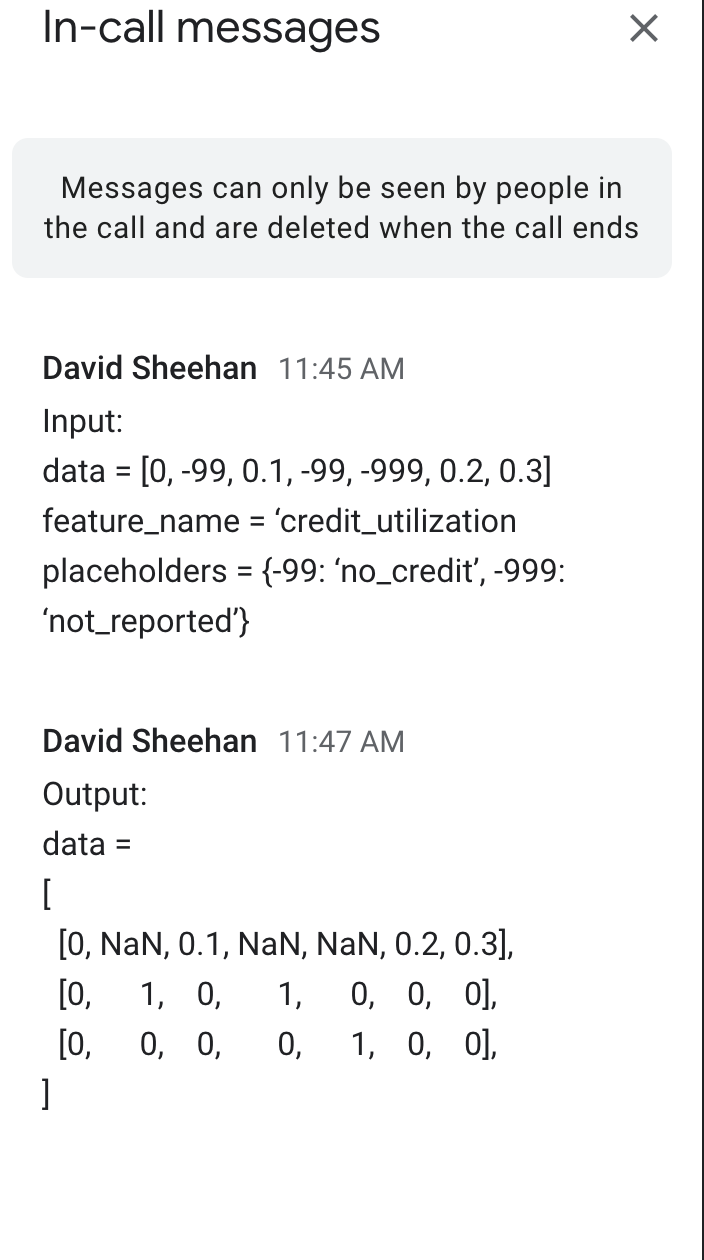

In [ ]:
def oneHot(input, placeholders):
  data = []
  res = []

  for i in range(len(input)):
      if input[i] in placeholders:
        data.append("NaN")
      else:
        data.append(input[i])

  res.append(data)
  for key in placeholders.keys():
    cur = [0 for i in range(len(input))]
    for i in range(len(cur)):
        if input[i] == key:
          cur[i] = 1
    res.append(cur)
  return res

In [ ]:
input = [0, -99, 0.1, -99, -999, 0.2, 0.3]
placeholders = { -99: "no_credit", -999: "not_reported"}
# oneHot(input, placeholders)

In [ ]:
input = [0, -99, 0.1, -99, -999, 0.2, 0.3]
res = []
for key in placeholders.keys():
  cur = [0 for i in range(len(input))]
  for i in range(len(cur)):
      if input[i] == key:
        cur[i] = 1
  res.append(cur)
print("rest" + str(res))

rest[[0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0]]


In [ ]:
def oneHot(input, placeholders):
  data = input
  res = []
  no_credit = []
  not_report = []

  for i in range(len(data)):
      if data[i] in placeholders:
        data[i] = "NaN"
        if data[i] == -99:
          no_credit.append(1)
        count += 1
 
  return res

-99
-999


# 7.(Array)

## Q1: [1480. Running Sum of 1d Array](https://leetcode.com/problems/running-sum-of-1d-array/)

In [ ]:
def runningSum(self, nums: List[int]) -> List[int]:
    if not nums or len(nums) < 2:
        return nums
    dp = [nums[0] for i in nums]
    for i in range(1, len(nums)):
        dp[i] = dp[i - 1] + nums[i]
    return dp

In [ ]:
nums = [1,2, 3, 4]
res = [nums[0] for i in nums]

for i in range(1, len(nums)):
  res[i] = res[i-1] + nums[i]

print (res)

[1, 3, 6, 10]


## Q2: [35. Search Insert Position](https://leetcode.com/problems/search-insert-position/)

[Binary search](https://www.youtube.com/watch?v=RH3tZldhjJ0) 

In [ ]:
def searchInsert(self, nums: List[int], target: int) -> int:
    strt = 0 #start index
    end = len(nums) - 1 #end index
    while strt <= end:
        mid = (strt + end) // 2 
        if target < nums[mid]: 
            end = mid - 1 
        elif target > nums[mid]: 
            strt = mid + 1 
        else:
            return mid
    return strt 

## Q3: [33. Search in Rotated Sorted Array](https://leetcode.com/problems/search-in-rotated-sorted-array/)

In [ ]:
def search(self, nums: List[int], target: int) -> int:
    #corner case
    if not nums:
        return -1
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        if nums[mid] < nums[right]:
            if nums[mid] < target and target <= nums[right]:
                left = mid + 1
            else:
                right = mid - 1
        else:
            if nums[mid] > target and target >= nums[left]:
                right = mid - 1
            else:
                left = mid + 1
    return -1

## Q4: [81. Search in Rotated Sorted Array II](https://leetcode.com/problems/search-in-rotated-sorted-array-ii/)

In [ ]:
def search(self, nums: List[int], target: int) -> bool:
    #corner case
    if not nums:
        return -1
    left = 0
    right = len(nums) - 1
    while left <= right:
        while left < right and nums[left] == nums[left+1]:
            left += 1
        while left < right and nums[right] == nums[right-1]:
            right -= 1
        mid = (left + right) // 2
        if nums[mid] == target:
            return True
        
        if nums[mid] < nums[right]:
            if nums[mid] < target and target <= nums[right]:
                left = mid + 1
            else:
                right = mid - 1
        else:
            if nums[mid] > target and target >= nums[left]:
                right = mid - 1
            else:
                left = mid + 1
    return False

# 8.(binary search)

## Q1: [69. Sqrt(x)](https://leetcode.com/problems/sqrtx/)


In [ ]:
def mySqrt(self, x: int) -> int:
    ## APPROACH : Binary Search ##
    #   1. Any number greater than 1, will have sqrt(n) less than n/2
    #   2. We can check i*i < n till n/2.
    #   3. Can be optimized with binary search, listing all nums till n/2 and check i*i < n
    #corner case
    if x < 4:
        if x != 0:
            return 1
        else:
            return 0
    left = 0
    right = x // 2
    while left <= right:
        mid  = (left + right) // 2
        if mid ** 2 < x:
            left = mid + 1
        elif mid ** 2 > x:
            right = mid - 1
        else:
            return mid
    return right

## Q2: [162. Find Peak Element](https://leetcode.com/problems/find-peak-element/)
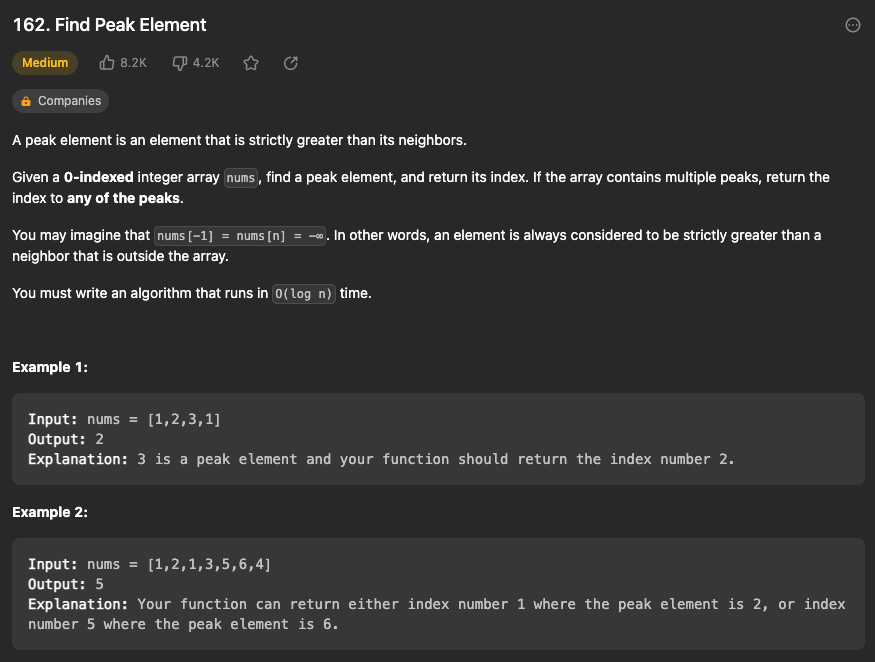

In [ ]:
#https://blog.csdn.net/danspace1/article/details/86645720
def findPeakElement(nums):
    left, right = 0, len(nums) - 1
    while left < right :
        mid = (left + right)//2
        if nums[mid] > nums[mid+1]:
            right = mid
        else:
            left = mid + 1
    return left 

In [ ]:
nums = [1,2,1,3,5,6,4]
findPeakElement(nums)

5

## Q3: [34. Find First and Last Position of Element in Sorted Array](https://leetcode.com/problems/find-first-and-last-position-of-element-in-sorted-array/)

In [ ]:
def searchRange(self, nums: List[int], target: int) -> List[int]:
    left = self.findFirstOccurIndex(nums, target)
    right = self.findLastOccurIndex(nums, target)
    return [left, right]
    
def findFirstOccurIndex(self, nums: List[int], target: int) -> int:
    index = -1 #5 
    left, right = 0, len(nums) -1 #6
    
    while left <= right: #7
        mid = (left + right) // 2 #8
  
        if nums[mid] == target: #9
            index = mid #10
            right = mid - 1 #11
        elif nums[mid] > target:  #12
            right = mid - 1 #13
        else:  #14
            left = mid + 1 #15       
    
    return index
def findLastOccurIndex(self, nums: List[int], target: int) -> int:
    index = -1
    left, right = 0, len(nums) -1
    
    while left <= right:
        
        mid = (left + right) // 2
        
        if nums[mid] == target:
            index = mid
            left = mid + 1 #16
        elif nums[mid] > target: 
            right = mid - 1
        else:
              left = mid + 1
        
        
    
    return index

# 12/15/22 (蒸汽python)

## Q1: [replace-words-with-stems (python)](https://leetcode.com/problems/replace-words/solutions/?orderBy=most_votes)
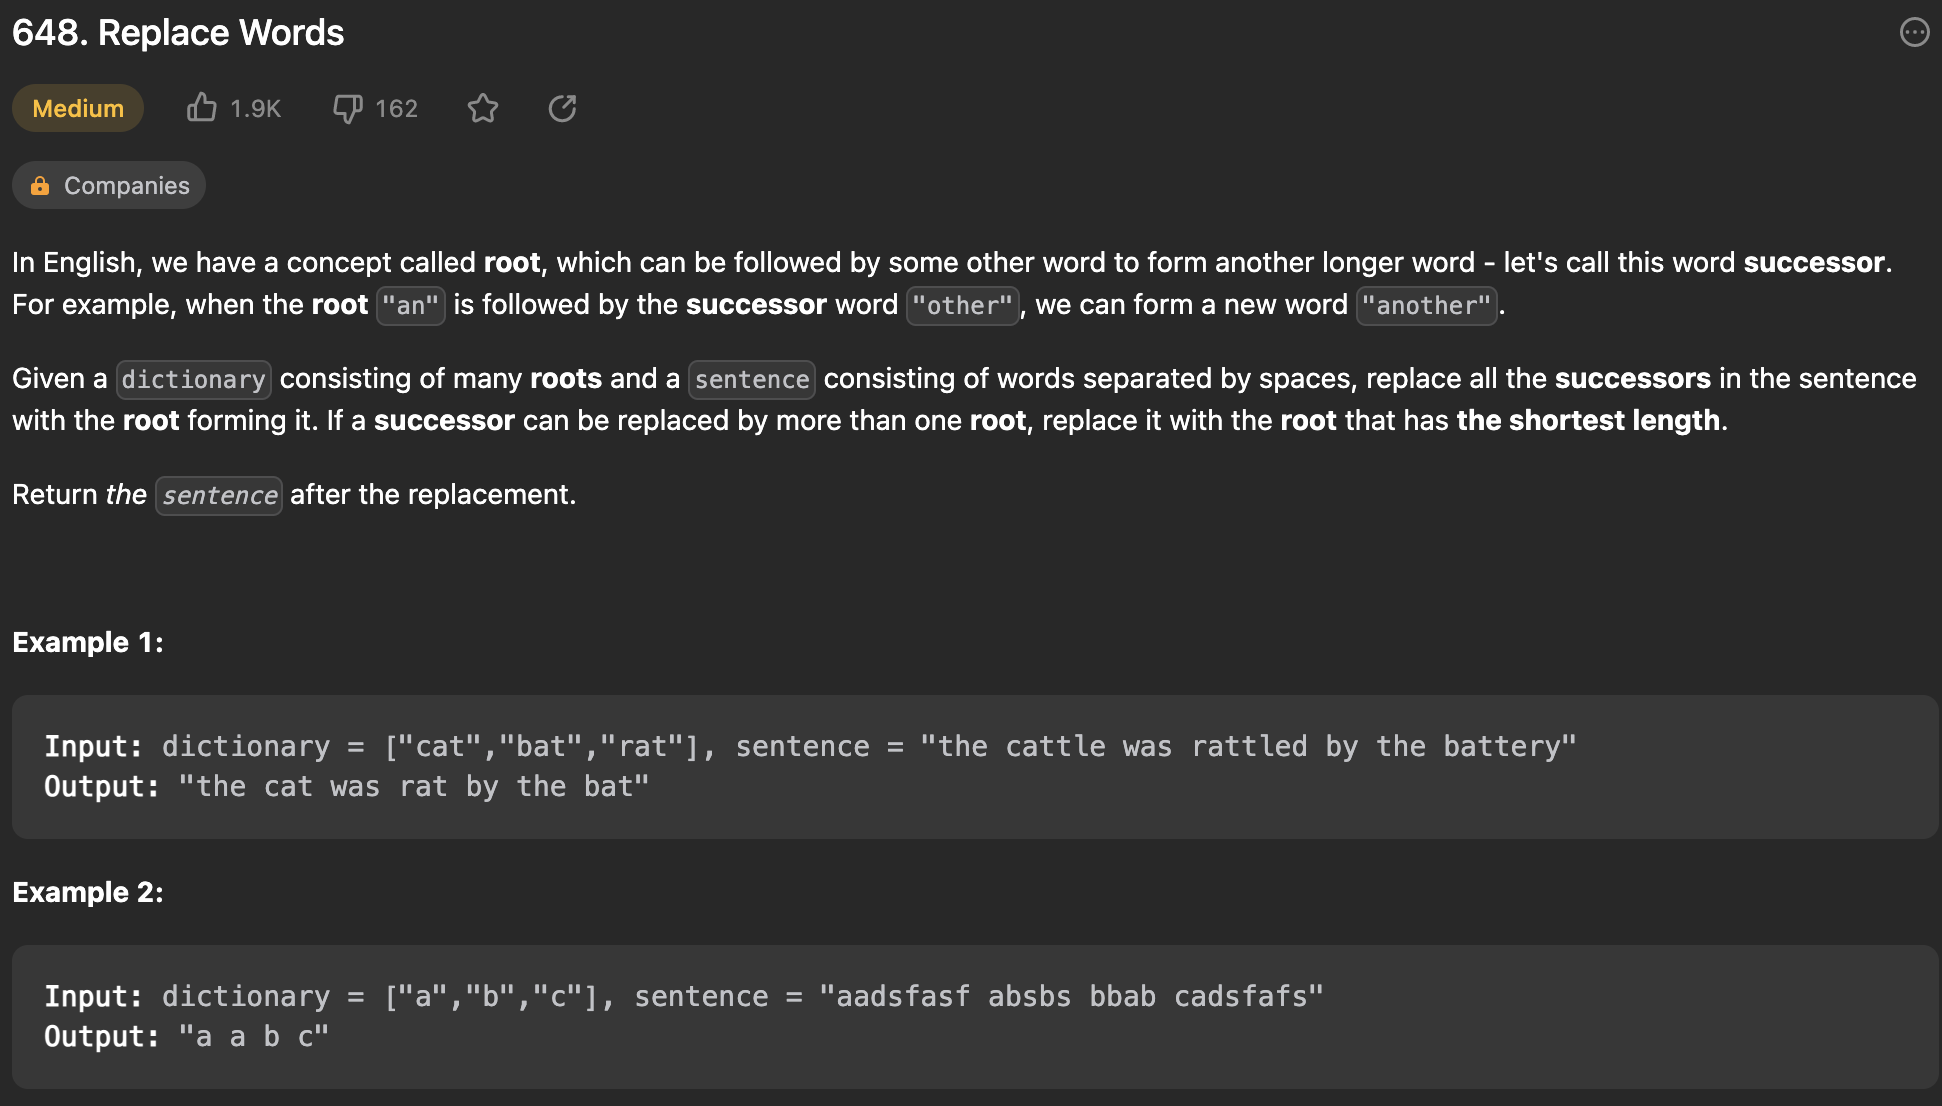

In [ ]:
def replaceWords(self, roots, sentence):
    rootset = set(roots)

    def replace(word):
        for i in xrange(1, len(word)):
            if word[:i] in rootset:
                return word[:i]
        return word

    return " ".join(map(replace, sentence.split()))

## Q2: [minimum-change (python)](https://leetcode.com/problems/coin-change/description/)

In [ ]:
class Solution(object):
    def coinChange(self, coins, amount):
        MAX = float('inf')
        dp = [0] + [MAX] * amount

        for i in xrange(1, amount + 1):
            dp[i] = min([dp[i - c] if i - c >= 0 else MAX for c in coins]) + 1

        return [dp[amount], -1][dp[amount] == MAX]

## Q3: [friendship-timeline (python)](https://priyankabanerjee.medium.com/guide-for-data-science-interview-python-71901df4bd44)

In [ ]:
#https://priyankabanerjee.medium.com/guide-for-data-science-interview-python-71901df4bd44
def friendship_timeline(fd_added, fd_removed):
    friendship = []
    for rem in fd_removed:
        for add in fd_added:
            if sorted(rem['user_ids']) == sorted(add['user_ids']):
                fd_added.remove(add)
                friendship.append({
                    'user_ids': sorted(rem['user_ids']),
                    'start_date': add['created_at'],
                    'end_date': rem['created_at']
                })
                break
    return sorted(friendship, key=lambda x: x['user_ids'])

## Q4: [multi-modal-sample (python)](https://www.glassdoor.com/Interview/1-coding-question-Write-a-function-for-sampling-from-a-multimodal-distribution-Your-inputs-are-Keys-i-e-green-r-QTN_3822244.htm)

In [ ]:
#from openAI
import random

def sample_multimodal(keys, weights, num_samples):
  # Create a list of weighted choices, where each key appears
  # as many times as its weight
  choices = []
  for key, weight in zip(keys, weights):
    choices.extend([key] * int(weight))
  
  # Randomly choose num_samples elements from the list of choices
  return random.sample(choices, num_samples)

## Q5: [prime-to-n (python)](https://stackoverflow.com/questions/11619942/print-series-of-prime-numbers-in-python)

In [ ]:
def primes_method1(n):
    out = list()
    for num in range(1, n+1):
        prime = True
        for i in range(2, num):
            if (num % i == 0):
                prime = False
                print (i)
                break
        if prime:
            out.append(num)
    return out

## Q6: [find-the-missing-number (python)](https://leetcode.com/problems/missing-number/description/)

In [ ]:
def missingNumber(self, nums):
    num_set = set(nums)
    n = len(nums) + 1
    for number in range(n):
        if number not in num_set:
            return number

## Q7: [move-zeros-back (python)](https://leetcode.com/problems/move-zeroes/)

In [ ]:
def moveZeroes(self, nums: List[int]) -> None:
    """
    Do not return anything, modify nums in-place instead.
    """
    #corner case
    if not nums or len(nums) == 1:
        return
    slow = fast = 0
    while fast < len(nums):
        if nums[fast] != 0:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    while slow < len(nums):
        nums[slow] = 0
        slow += 1

## Q8: [equivalent-index (python)](https://leetcode.com/problems/find-pivot-index/description/)

In [ ]:
def pivotIndex(self, nums):
    # Time: O(n)
    # Space: O(1)
    left, right = 0, sum(nums)
    for index, num in enumerate(nums):
        right -= num
        if left == right:
            return index
        left += num
    return -1

# 1/6/23 (蒸汽python)

## Q1: [how-many-friends(algorithms)](https://www.glassdoor.com/Interview/python-question-given-a-two-dimensional-list-for-example-2-3-3-4-5-person-2-is-friends-with-3-etc-find-how-many-QTN_4014845.htm)
You are given a list of lists where each group represents a
friendship. For example, given the list: list = [[2,3],[3,4],[5]] Person 2 is friends with person 3, person 3 is friends with person 4, etc. Write a function to find how many friends each person has. how-many-friends(algorithms) 难度标题 【Medium】 公司标签 / 题目标签 【algorithms】

friends = [[1,3],[2,3],[3,5],[4]] friends = [[1],[2],[3],[4]]

[(1,1), (2,1), (3,3), (4,0), (5,1)]

Explanation: every person has no friends on the friends list

In [ ]:
def friends(rels):
    fs = dict()
    for r in rels:
        if len(r) == 1:
            if r[0] not in fs:
                fs[r[0]] = 0
        else:
            if r[0] not in fs:
                fs[r[0]] = 1
            else:
                fs[r[0]] += 1
            if r[1] not in fs:
                fs[r[1]] = 1
            else:
                fs[r[1]] += 1
    return fs

In [ ]:
#WRONG!!!!!!!!!!
def friends(rels):
    fs = dict()
    for r in rels:
        if len(r) == 1:
            fs[r[0]] = 0
        else:
            fs[r[0]] =+ 1
            fs[r[1]] =+ 1
    return fs

In [ ]:
from collections import Counter

def friends(rels):
    fs = Counter()
    for r in rels:
        if len(r) == 1:
            fs[r[0]] = 0
        else:
            fs[r[0]] += 1
            fs[r[1]] += 1
    return fs

In [ ]:
#相比于python dict(), 
#1. defaultdict可以通过设置default defaultdict(int)或者defaultdict(list)来确定value的形式。
#2. defaultdict不需要检查key是否在dictionary中，如果不存在defaultdict(int)的默认值为0；defaultdict(list)的默认值为[]。而dict不检查会报错！
#3. defaultdict通过from collections import defaultdict来import
from collections import defaultdict

def friends(rels):
    fs = defaultdict(int)
    for r in rels:
        if len(r) == 1:
            fs[r[0]] += 0
        else:
            fs[r[0]] += 1
            fs[r[1]] += 1
    return fs

In [ ]:
rels = [[1,3],[3,5],[3,5],[4]] 
friends(rels)

{1: 1, 3: 3, 5: 2, 4: 0}

## Q2: [1200. Minimum Absolute Difference](https://leetcode.com/problems/minimum-absolute-difference/)

In [ ]:
def minimumAbsDifference(self, arr: List[int]) -> List[List[int]]:
    # Sort the original array
    arr.sort()

    # Initialize minimum difference `min_pair_diff` as a huge integer in order not 
    # to miss the absolute difference of the first pair. 
    min_pair_diff = float('inf')
    answer = []

    # Traverse the sorted array
    for i in range(len(arr) - 1):
        # For the absolute value `curr_pair_diff` of the current pair:
        curr_pair_diff = arr[i + 1] - arr[i]

        # If `curr_pair_diff` equals `min_pair_diff`, add this pair to the answer list.
        # If `curr_pair_diff` is smaller than `min_pair_diff`, discard all pairs in the answer list, 
        # add this pair to the answer list and update `min_pair_diff`.
        # If `curr_pair_diff` is larger than `min_pair_diff`, we just go ahead.
        if curr_pair_diff == min_pair_diff:
            answer.append([arr[i], arr[i + 1]])
        elif curr_pair_diff < min_pair_diff:
            answer = [[arr[i], arr[i + 1]]]
            min_pair_diff = curr_pair_diff

    return answer

## Q3: [134. Gas Station](https://leetcode.com/problems/gas-station/description/)

In [ ]:
#Brute Force Solution
{
        int n = gas.length;
        for(int i = 0; i < n; i++){
            int totalFuel = 0;
            int stopCount = 0, j = i;
            while(stopCount < n){
                totalFuel += gas[j % n] - cost[j % n];
                if(totalFuel < 0) break; // whenever we reach -ve
                stopCount++;
                j++;
            }
            if(stopCount == n && totalFuel >= 0) return i; // cover all the stops & our fuel left is 0 or more than that
        }
        return -1;

In [ ]:
#https://www.cnblogs.com/grandyang/p/4266812.html
def canCompleteCircuit(self, gas, cost):
    """
    :type gas: List[int]
    :type cost: List[int]
    :rtype: int
    """
    n = len(gas)
    
    total_tank, curr_tank = 0, 0
    starting_station = 0
    for i in range(n):
        total_tank += gas[i] - cost[i]
        curr_tank += gas[i] - cost[i]
        # If one couldn't get here,
        if curr_tank < 0:
            # Pick up the next station as the starting one.
            starting_station = i + 1
            # Start with an empty tank.
            curr_tank = 0
    
    return starting_station if total_tank >= 0 else -1

# 1/10/23 (蒸汽python)

## Q1: optimal-host(algorithms) TODO

Let’s say we have a group of NN friends represented by a
list of dictionaries where each value is a friend name and
their location on a three dimensional scale of (x,y,zx,y,z). The
friends want to host a party but want the friend with the
optimal location (least distance to travel as a group) to host
it.
Write a function pick_host to return the friend that should host
the party. 
input: 
friends = [
{'name': 'Bob', location: (5,2,10)},
{'name': 'David', location: (2,3,5)},
{'name': 'Mary', location: (19,3,4)},
{'name': 'Skyler', location: (3,5,1)},
]

def optimal_host(friends) -> 'David



In [ ]:
#from chatGPT
from math import sqrt

def pick_host(friends):
  def distance(a, b):
    return sqrt((a['x'] - b['x'])**2 + (a['y'] - b['y'])**2 + (a['z'] - b['z'])**2)

  def distance_sum(friend):
    return sum(distance(friend, f) for f in friends if f != friend)

  return min(friends, key=distance_sum)

## Q2: truncated-distribution(python) TODO

Given a percentile_threshold, sample size N, and mean and standard
deviation m and sd of the normal distribution, write a function
truncated_dist to simulate a normal distribution truncated at percentile_
threshold.

m = 2
sd = 1
n = 6
percentile_threshold = 0.75

def truncated_dist(m,sd,n, percentile_threshold): ->

[2, 1.1, 2.2, 3, 1.5, 1.3]

All values in the output sample are in the lower 75% =
percentile_threshold of the distribution.

In [ ]:
#from ChatGPT
import random
import numpy as np

def truncated_dist(m, sd, n, percentile_threshold):
  samples = []
  while len(samples) < n:
    sample = random.normalvariate(m, sd)
    if sample < np.percentile(samples + [sample], percentile_threshold*100):
      samples.append(sample)
  return samples

m = 2
sd = 1
n = 6
percentile_threshold = 0.75
truncated_dist(m, sd, n, percentile_threshold)  # Returns: [2, 1.1, 2.2, 3, 1.5, 1.3]

## Q152: gaussian-generation(python)
Given two parameters, a size n, a mean mu and sigma sigma
write a function to generate a gaussian distribution.

In [ ]:
#from ChatGPT
import random

def generate_distribution(n, mu, sigma):
  return [random.normalvariate(mu, sigma) for _ in range(n)]

n = 9
mu = 3
sigma = 1
generate_distribution(n, mu, sigma)  # Returns: [1, 2, 2, 3, 3, 3, 4, 4, 5]

##Q154: term-frequency(python)
Say you are given a text document in the form of a string
with the following sentences:

In [ ]:
#ChatGPT
from nltk.corpus import stopwords

document = "I have a nice car with nice tires"
tokens = nltk.word_tokenize(document)
filtered_words = [word for word in tokens if word.lower() not in stopwords.words('english')]
print(filtered_words)  # Output: ['nice', 'car', 'nice', 'tires']


##Q173: greater-release-dates(python)

In [ ]:
#from ChatGPT
from datetime import datetime

def more_dates_after(D, L1, L2):
  # Convert the reference date to a datetime object
  D = datetime.strptime(D, '%Y-%m-%d')

  # Count the number of dates past the reference date in each list
  count1 = sum(datetime.strptime(date, '%Y-%m-%d') > D for date in L1)
  count2 = sum(datetime.strptime(date, '%Y-%m-%d') > D for date in L2)

  # Return the list with more dates past the reference date
  if count1 > count2:
    return L1
  elif count2 > count1:
    return L2
  else:
    return []  # Return an empty list if both lists have the same number of dates past the reference date

D = "2020-03-01"
L1 = ["2020-01-21", "2020-01-09", "2020-01-10", "2020-02-14", "2020-03-01"]
L2 = ["2020-01-20", "2020-04-02", "2020-02-08", "2020-03-01"]
more_dates_after(D, L1, L2)  # Returns: L1

['2020-01-20', '2020-04-02', '2020-02-08', '2020-03-01']

##Q174: find-mismatched-words(python)
?????

##Q175 fill-none-values(python)

In [ ]:
def fill_None_Value(lst):
  stack = []
  if lst[0] == None:
      stack.append(0)
      lst[0] = 0
  else:
      stack.append(lst[0])
  for i in range(1, len(lst)):
    if lst[i] == None and stack:
      lst[i] = stack[-1]
    else:
      stack.pop()
      stack.append(lst[i])
  return lst

In [ ]:
input_list = [None,2,None,None,4,5,None]
fill_None_Value(input_list)

[0, 2, 2, 2, 4, 5, 5]

##Q177: nxn-grid-traversal(algorithms) TODO
Given an integer n, write a function traverse_count to
determine the number of paths from the top left corner of
an n×n grid to the bottom right. You may only move right or
down.

##Q192: random-number(algorithms) 
Given a stream of numbers, select a random number from the
stream, with O(1) space in selection.

In [ ]:
#from ChatGPT 水库问题
import random

def random_number_from_stream(stream):
  result = stream[0]  # initialize result to the first number in the stream
  count = 1
  for num in stream[1:]:  # iterate through the rest of the stream
    r = random.randint(0, count)  # generate a random number between 0 and count (inclusive)
    if r == 0:  # if the random number is 0, set result to the current number
      result = num
    count += 1  # increment count
  return result

stream = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(random_number_from_stream(stream))  # prints a random number from the stream

##Q193: max-width(algorithms) TODO
Given an array of words and a max_width parameter, write a function
justify to format the text such that each line has exactly max_width
characters. Pad extra spaces ’ ‘ when necessary so that each line has
exactly max_width characters.
Extra spaces between words should be distributed as evenly as
possible. If the number of spaces on a line does not divide evenly
between words, place excess spaces on the right-hand side of each
line.
Note: You may assume that there is no word in words that is longer
than max_width.

In [ ]:
##Q193: max-width(algorithms)

##Q196 minimum-directional-path(algorithms) TODO
You are given the layout of a rectangular building with rooms forming
a grid. Each room has four doors to the room to the north, east, south,
and west where exactly one door is unlocked and the other three
doors are locked. In each time step, you can move to an adjacent room
via an unlocked door.
Your task is to determine the minimum number of time steps required
to get from the northwest corner to the southeast corner of the
building.
Note: If the path doesn’t lead you to exit return -1 .
The input is given as:
•a non-empty 2d-array of letters 'N', 'E', 'S', 'W' named ‘building’
•‘building[0][0]’ represents the open door at the northwest corner.
•The rows of this array are associated with the north-south direction.
•The columns are associated with the east-west direction.

In [ ]:
##Q196 minimum-directional-path(algorithms)

##Q207:density-to-cumulative(python) TODO
Input: def to_cdf(pdf)
return(cdf) ->
Input
pdf = [1.2,3.4,5.3]

Output

cdf = [1.2,4.6,9.9]

In [ ]:
#from ChatGPT
def to_cdf(pdf):
  cdf = [pdf[0]]  # initialize cdf with the first element of pdf
  for i in range(1, len(pdf)):
    cdf.append(cdf[i-1] + pdf[i])  # add the current element of pdf to the previous element of cdf
  return cdf

pdf = [0.1, 0.2, 0.3, 0.4]
print(to_cdf(pdf))  # Output: [0.1, 0.3, 0.6, 1.0]

##Q225: split-data-without-pandas(python) TODO

##Q235：random-forest-from-scratch (algorithms) TODO

In [ ]:
#from chatGPT
import pandas as pd
import numpy as np
from itertools import permutations

class RandomForest:
    def __init__(self, dataframe, new_point):
        self.df = dataframe
        self.new_point = new_point
        self.permutations = list(permutations(dataframe.columns))
    def train(self):
        # initialize a list to store the class predictions for each tree
        self.predictions = []
        # iterate through all permutations of value columns
        for perm in self.permutations:
            # initialize a counter to track the number of instances in each class
            class_counts = {0: 0, 1: 0}
            # iterate through all rows of the dataframe
            for i in range(len(self.df)):
                # check if the new_point value matches the current row's value for all columns in the permutation
                if all(self.df.loc[i, perm] == self.new_point[list(perm)]):
                    # if the match is true, increment

##Q241 check-matching-parentheses (algorithms)

In [ ]:
#From ChatGPT
def string_parser(list_of_strings):
    def is_balanced(string):
        stack = []
        open_parenthesis = "([{"
        close_parenthesis = ")]}"
        for char in string:
            if char in open_parenthesis:
                stack.append(char)
            elif char in close_parenthesis:
                if not stack:
                    return False
                current_open = stack.pop()
                if current_open == "(" and char != ")":
                    return False
                if current_open == "[" and char != "]":
                    return False
                if current_open == "{" and char != "}":
                    return False
        return not stack
    return [is_balanced(string) for string in list_of_strings]

list_of_strings = [
'f(x) + g(x)',
'sin(exp(x)}',
'((())just some string)',
'(4,{(3,4):x**2)'
]
print(string_parser(list_of_strings))  # Output: [True, False, True, False]


[True, False, True, False]


##Q246: automatic-histogram(python) TODO

Given a list of integers called dataset, write a function called
automatic_histogram to automatically generate a dictionary
representing a histogram of the data set with x bins uniformly
distributed over the values.
Note: You should not include any bins that have zero values in them in
your dictionary.
Note: Do NOT use numpy or pandas.



In [ ]:
#from ChatGPT
def automatic_histogram(dataset, x):
    # determine the minimum and maximum values in the dataset
    min_val = min(dataset)
    max_val = max(dataset)
    
    # find the range of the dataset
    data_range = max_val - min_val
    
    # calculate the bin size
    bin_size = data_range/x
    
    # initialize the dictionary to hold the histogram
    hist = {}
    
    # iterate through the dataset and add the values to the appropriate bin
    for val in dataset:
        bin_num = int((val - min_val) / bin_size)
        if bin_num in hist:
            hist[bin_num] += 1
        else:
            hist[bin_num] = 1
    
    # remove the bins with zero values
    hist = {k: v for k, v in hist.items() if v != 0}
    
    return hist
    
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
x = 3
print(automatic_histogram(data, x))


##Q252: check-normality(python) TODO
Write a function that checks if a list of integers is normally
distributed.
Specifically given a list of 100 numbers, write a function that
returns a score that measures the deviation from normality.
I.E. a normally distributed list of integers would return 0.
Note: Use What Is called the 68-95-99.7 rule of thumb for
normal distributions.
Bonus: Don’t use any graphical output or a statistical test for
normality.

In [ ]:
#From ChatGPT
import statistics
def normal_distribution_score(data):
    mu = statistics.mean(data)
    sigma = statistics.stdev(data)
    count = 0
    for i in data:
        if i<=mu+sigma and i>=mu-sigma:
            count += 1
    return (100-count)/100

##Q257 programming-risk-combat(algorithms) TODO
In a simplified version of the board game Risk, combat follows the following rules:
1.Two players, an attacker and a defender have a squad of units. Each unit in a squad rolls a 6-sided
die to determine their damage value.
2.The rolls of the units are ranked in order and rolls of the same rank on each side are compared
against each other. So the largest roll on the defender’s side to compared against the largest roll

on the attacker’s side, the second-largest roll on the defender’s is compared against the second-
largest roll on the attack’s side, etc. In each match-up, the side with the higher roll gains a point.

–If there is a tie in a match-up, the defender gains a point.
–If the attacker and defender have a different number of units, only match-ups between ranks less
than or equal to the number of units in the squad with a lower number of units are considered.
–For example, if there are 2 units vs 3 units, only the first and second highest rolls of each squad
are used for comparison.
3.The side with the higher number of points wins the battle (the defender wins if there is a tie in
the number of points).
Write a function to simulate a battle in Risk given the attacker_squad_size and defender_squad_size
of the two players. Return a tuple of (atk_rolls,def_rolls,def_win) where:
•atk_rolls is the rolls of the attacker
•def_rolls is the rolls of the defender
•def_win is a boolean that says if the defender won or not
Note: Use random rather than numpy to generate random values

##Q258: knn-from-scratch(algorithms) TODO
Build a k Nearest Neighbors classification model from scratch with the
following conditions:
•Use Euclidian distance (aka, the “2 norm”) as your closeness metric
•Your function should be able to handle data frames of arbitrary many
rows and columns
•If there is a tie in the class of the k nearest neighbors, rerun the
search using k − 1 neighbors instead
•You may use pandas and numpy but NOT scikit-learn

##Q261: marked-lists(algorithms) TODO

In [ ]:
#From ChatGPT
def merge_and_mark(list1, list2):
    # initialize variables to keep track of current indices in each list
    i = 0
    j = 0
    # initialize an empty list to store the merged and marked items
    result = []
    # iterate until we've reached the end of one of the input lists
    while i < len(list1) and j < len(list2):
        # compare the current items in each list
        if list1[i] < list2[j]:
            # if the item from list1 is smaller, add it to the result list
            # and mark it with a "1"
            result.append(list1[i] + "1")
            i += 1
        else:
            # if the item from list2 is smaller, add it to the result list
            # and mark it with a "2"
            result.append(list2[j] + "2")
            j += 1
    # add any remaining items from list1 to the result list
    while i < len(list1):
        result.append(list1[i] + "1")
        i += 1
    # add any remaining items from list2 to the result list
    while j < len(list2):
        result.append(list2[j] + "2")
        j += 1
    # return the final result
    return result


##Q262: sum-to-zero(python) TODO

In [ ]:
#From GPT
def subset_sum_zero(numbers):
    # Edge case check if number zero is in the list, return empty list
    if 0 in numbers:
        return []
    
    # Initialize an empty list to store subsets that sum to zero
    subsets = []
    # Iterate through the numbers in the input list
    for i in range(len(numbers)):
        # Iterate through subsets of the remaining numbers
        for subset in subset_sum_zero(numbers[i+1:]):
            # Add the current number to each subset
            subset.append(numbers[i])
            # Check if the sum of the subset is zero
            if sum(subset) == 0:
                # if the sum of the subset is zero and it not contain 0,
                # then add it to subsets
                subsets.append(subset)
    return subsets

##Q270: filling-supermarket-bag(algorithms) TODO
Let’s say you’re in a supermarket.
You’ve found out that there is a huge discount on some items you
want; unfortunately, you only have one bag with a certain bag_
capacity. Each of the items has its own value and capacity, stored
in lists called values and capacities contained in a dictionary called
items.
Write a function to pick the items that maximize the total value
without exceeding the bag’s capacity and return the total value.
Note: You can’t take more than one copy of each item home. Also, you
do not need to fill the entire bag to capacity.

##Q272 5th-largest-number(algorithms)
You’re given numlists, a list where each element is a list of at least five
numbers.
Write a function list_fifths that returns a list of the fifth-largest number
from each element in numlists. Return the list in ascending order.

In [ ]:
#From ChatGPT
def list_fifths(numlists):
    fifths = []
    for lst in numlists:
        lst.sort(reverse=True)
        fifths.append(lst[4])
    fifths.sort()
    return fifths


##Q278: maximal-substring(algorithms)
Given two strings, string1 and string2, write a function max_substring
to return the maximal substring shared by both strings.

In [ ]:
#From GPT
def max_substring(string1, string2):
    max_substring = ""
    for i in range(len(string1)):
        for j in range(i, len(string1)):
            substring = string1[i:j+1]
            if substring in string2 and len(substring) > len(max_substring):
                max_substring = substring
    return max_substring

#DP method

### 40. Bootstrapping for parameter estimate

Given an array, use bootstrap method to get the variance of mean

Some notes from Haiyang:
https://towardsdatascience.com/bootstrapping-the-standard-deviation-fb415a9d7f39 

The CI calculation of bootstrapping method is different compared to t-test method. 

Bootstrapping and t-test are both methods used to calculate confidence intervals, but they are based on different principles.

A t-test is a statistical procedure that compares the mean of a sample to a known or hypothesized value. It is used to determine whether the sample mean is statistically different from the population mean. A t-test can be used to calculate a confidence interval for the population mean, which is the range of values within which the true population mean is likely to fall.

On the other hand, bootstrapping is a resampling method that uses random sampling with replacement to estimate the sampling distribution of a statistic, such as the mean. It generates a large number of samples from the original sample data and then calculates the mean for each sample. The confidence interval is based on the distribution of these means.

In summary, Both Bootstrapping and t-test can be used to calculate a confidence interval, but they are based on different principles and assumptions. The t-test assumes that the population follows a normal distribution, while bootstrapping makes no assumptions about the underlying distribution of the data.

When the bootstrapped mean falls within the confidence interval, **it means that the estimate of the mean from the sample data is likely to be representative of the true population mean.** The confidence interval is a range of values that is calculated from the sample data and is used to estimate the range of possible values for the population mean. If the bootstrapped mean falls within this range, it suggests that the sample data is a good representation of the population and the estimate of the population mean is reliable.

64.35081031776666

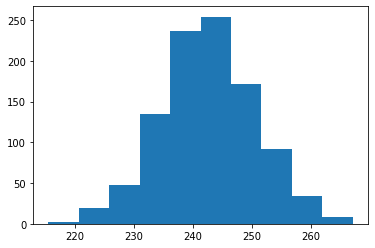

In [ ]:
# bootstrap method to get the variance of mean 
import numpy as np
nums = np.random.randint(0,500, size = 1000)

sample_mean= []
for n in range(1000):
  sample_n = np.random.choice(nums, size = 300)
  sample_mean.append(sample_n.mean())

import matplotlib.pyplot as plt
plt.hist(sample_mean)

np.var(sample_mean)

# 1/24/23 (Jay from Interview Query)


1.   Algorithm questions in email "More Interview question collected".


##This question was asked by: QiO | [Rearranging Digits](https://www.interviewquery.com/questions/rearranging-digits)

In [ ]:
#company name 

##This question was asked by: Google (pandas) | [Bucket Test Scores](https://www.interviewquery.com/questions/bucket-test-scores)

##This question was asked by: Bloomberg | [5th Largest Number](https://www.interviewquery.com/questions/5th-largest-number)

In [ ]:
def list_fifths(numlists, d):
    return [sorted(item, reverse = True)[d-1] for item in numlists]

In [ ]:
import heapq

def list_fifths(numlists):
    fifths = []
    for lst in numlists:
        fifths.append(heapq.nth(lst, -5))
    fifths.sort()
    return fifths

In [ ]:
numlists = [ [1,2,3,4,5], [3,1,2,5,4], [1,2,3,4,5,6,7], 
[99, 320, 400, 100.25, 55.2, 0.1] ]

list_fifths(numlists)

[1, 1, 3, 55.2]

In [ ]:
def list_fifths(numlists):
    res = []

    for lst in numlists:
        lst = sorted(lst, reverse = True)
        res.append(lst[4])
    return res

In [ ]:
list_fifths(numlists)

[1, 1, 3, 55.2]

##This question was asked by: Wish | [Intersecting Lines](https://www.interviewquery.com/questions/intersecting-lines#comments)

In [ ]:
def find_intersecting(tuple_list,given_range):
    res = []
    for i in range(len(tuple_list) - 1):
        for j in range(i + 1, len(tuple_list)):
            if (tuple_list[i][0] - tuple_list[j][0]) != 0:
                intersect = (tuple_list[j][1] - tuple_list[i][1]) / (tuple_list[i][0] - tuple_list[j][0])
                if intersect < given_range[1] and intersect > given_range[0]:
                  if tuple_list[i] not in res:
                    res.append(tuple_list[i])
                  if tuple_list[j] not in res:
                    res.append(tuple_list[j])
    return res

In [ ]:
tuple_list = [(2, 3), (-3, 5), (4, 6), (5, 7)]
given_range = (0,1)
find_intersecting(tuple_list,given_range)

[(2, 3), (-3, 5)]

# 1/26/23 (heap & Jay from Interview Query)
####https://en.wikipedia.org/wiki/Binary_heap

##[215. Kth Largest Element in an Array](https://leetcode.com/problems/kth-largest-element-in-an-array/)

In [ ]:
import heapq
def findKthLargest(nums, k) -> int:
    heap = nums[:k]
    heapq.heapify(heap) 
    for num in nums[k:]:
        if num > heap[0]:
            heapq.heappop(heap)
            heapq.heappush(heap, num)
    return heap[0]

In [ ]:

nums = [3,2,3,1,2,4,4,5,5,6]
k = 4
findKthLargest(nums, k)

4

##[692. Top K Frequent Words](https://leetcode.com/problems/top-k-frequent-words/)

In [ ]:
from collections import defaultdict
import heapq

def topKFrequent( words, k: int):
    #corner case
    freq_dict = defaultdict(int)
    for i in words:
        freq_dict[i] += 1
    heap = []
    for key, value in freq_dict.items():
        heapq.heappush(heap, (-value, key))
    res = []
    while k > 0:
        res.append(heapq.heappop(heap)[1])
        k -= 1
    return res

In [ ]:
words = ["i","love","leetcode","i","love","i"]
k = 3
topKFrequent(words, k)

['i', 'love', 'leetcode']

##[23. Merge k Sorted Lists](https://leetcode.com/problems/merge-k-sorted-lists/)

In [ ]:
import heapq
class Solution:
    def mergeKLists(self, lists: List[ListNode]) -> ListNode:
        head = ListNode(None)
        curr = head
        h = []
        for i in range(len(lists)):
            if lists[i]:
                heapq.heappush(h, (lists[i].val, i))
                lists[i] = lists[i].next
        
        while h:
            val, i = heapq.heappop(h)
            curr.next = ListNode(val)
            curr = curr.next
            if lists[i]:
                heapq.heappush(h, (lists[i].val, i))
                lists[i] = lists[i].next
        
        return head.next

##[Decreasing Subsequent Values](https://www.interviewquery.com/questions/decreasing-subsequent-values#comments)

In [ ]:
def decreasing_values(arr):
    #corner case
    if not arr or len(arr) < 2:
        return []
    res = []
    flag = False
    for i in range(len(arr) - 1):
        flag = False
        for j in range(i + 1, len(arr)):
            if arr[i] < arr[j]:
                flag = True
                break
        if not flag:
            res.append(arr[i])
    #???
    if not res and not arr:
        if arr[-1] < res[-1]:
            res.append(arr[-1])
    else:
        res.append(arr[-1])
    return res

##[Possible Triangles](https://www.interviewquery.com/questions/possible-triangles)

#1/31/23 DFS


##[78. Subsets](https://leetcode.com/problems/subsets/)

In [ ]:
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        answers = []
        answer = []
        self.helper(answers, answer, nums, 0)
        return answers

    def helper(self, answers, answer, nums, index):
        #base case
        if index == len(nums):
            answers.append(answer[:])
            return
        #DFS
        #add elem
        answer.append(nums[index])
        self.helper(answers, answer, nums, index + 1)
        answer.pop()
        #not add elem
        self.helper(answers, answer, nums, index + 1)

##[46. Permutations](https://leetcode.com/problems/permutations/)

In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        answers, answer = [], []
        self.helper(answers, answer, nums)
        return answers

    def helper(self, answers, answer, nums):
        #base case
        if len(answer) == len(nums):
            answers.append(answer[:])
            return 
        #DFS
        for num in nums:
            if num not in answer:
                answer.append(num)
                self.helper(answers, answer, nums)
                answer.pop()

##[77. Combinations](https://leetcode.com/problems/combinations/description/)

In [ ]:
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        answers = []
        answer = []
        self.helper(answers, answer, n, k, 1) 
        return answers
    def helper(self, answers, answer, n, k, start):
        #base case
        if k == 0:
            answers.append(answer[:])
            return
        #DFS
        for i in range(start, n + 1):
            answer.append(i)
            self.helper(answers, answer, n, k - 1, i + 1)
            answer.pop()

##[22. Generate Parentheses](https://leetcode.com/problems/generate-parentheses/description/)

In [ ]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        answers = []
        answer = ''
        self.helper(answers, answer, n, 0, 0)
        return answers
    def helper(self, answers, answer, n, remain_left, remain_right):
        #base case
        if len(answer) == 2 * n:
            answers.append(answer)
            return
        #DFS 
        if remain_left < n:
            self.helper(answers, answer + '(', n, remain_left + 1, remain_right)
        if remain_right < remain_left:
            self.helper(answers, answer + ')', n, remain_left, remain_right + 1)

##[322. Coin Change](https://leetcode.com/problems/coin-change/description/)

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        n = len(coins)

        def dfs(idx, amount):
            if amount == 0:
                return 0
            if idx < n and amount > 0:
                min_cost = float('inf')
                for x in range(0, amount // coins[idx] + 1):
                    res = dfs(idx + 1, amount-x * coins[idx])
                    if res != -1:
                        min_cost = min(min_cost, res + x)
                return -1 if min_cost == float('inf') else min_cost
            return -1

        return dfs(0, amount)